In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


data = np.load('../data/SMP22to95_edge_seq.npy', allow_pickle=True)

ccodes = pd.read_csv('filtros/ccode_reindexed.csv')
pcode_four_digit = pd.read_csv('filtros/pcode_reindexed_four_digit.csv', dtype={'original_code': str})
pcode_descriptions = pd.read_csv('filtros/pcode_reindexed.csv', dtype={'original_code': str})
pcode_descriptions['original_code'] = pcode_descriptions['original_code'].apply(lambda x: x[:4])
años = list(range(1995, 1995 + 28))

In [18]:
def obtain_product_and_country_from_edge(u,v):
    # teniendo en cuenta que v_adj = v - (max_u + 1) y max_u = 136
    original_v =  v + 137
    country = ccodes[ccodes['code'] == u]['country_name'].iloc[0]
    product_code = pcode_four_digit[pcode_four_digit['code'] == original_v]['original_code'].iloc[0]
    product_descriptions = pcode_descriptions[pcode_descriptions['original_code'] == product_code]['description']


    print(f"Pais: {country} \n")

    print(product_code)
    print(product_descriptions)

In [19]:
#matrix values
max_u = 136
max_v = 1354
num_v = max_v - max_u  #real quantity of v nodes

adj_matrices = []

for year_data in data:

    adj_matrix = np.zeros((max_u + 1, num_v))

    for u, v, w in year_data:
        v_adj = v - (max_u + 1)  #adjust v index
        if w >= 1:
            weight = 1
        else:
            weight = 0
        adj_matrix[u, v_adj] = weight  #fill with binarized rca

    adj_matrices.append(adj_matrix)

In [20]:
#matrix values
max_u = 136
max_v = 1354
num_v = max_v - max_u  #real quantity of v nodes

adj_matrices_nb = []

for year_data in data:

    adj_matrix_nb = np.zeros((max_u + 1, num_v))

    for u, v, w in year_data:
        v_adj = v - (max_u + 1)  #adjust v index
        adj_matrix_nb[u, v_adj] = w  #fill with binarized rca

    adj_matrices_nb.append(adj_matrix_nb)


In [21]:
adj_Test = (adj_matrices_nb[21] >= 1).astype(int)


In [22]:
adj_Test = (adj_matrices_nb[21] >= 1).astype(int)
print(np.array_equal(adj_Test, adj_matrices[21]))


True


In [23]:
def probability_rca(product,year):
    adj_matrix = adj_matrices[year]
    frecuency = 0
    for country in range(137):
        frecuency += adj_matrix[country,product]
    return frecuency/137

In [24]:
probabilities_array_21 = np.zeros((1218))
for i in range(1218):
        probabilities_array_21[i] = probability_rca(i,21) #es bastante mas eficiente guardarlo en un array ya que reutilizamos los resultados

In [25]:
def probability_intersection_rca(product_i, product_j, year):
    adj_matrix = adj_matrices[year]
    frecuency = 0
    for country in range(137):
        frecuency += adj_matrix[country,product_i] * adj_matrix[country,product_j]
    return frecuency/137

def similarity(product_i, product_j, year, probability_array):
    intersection = probability_intersection_rca(product_i,product_j,year) 
    prob_ij = intersection/ probability_array[product_i] #intersection/probability_rca(product_i,year)
    prob_ji = intersection/probability_array[product_j] #intersection/probability_rca(product_j,year)
    return min(prob_ij,prob_ji)

In [26]:
def similarity_matrix_for(year,probabilities_array):
    similarity_matrix = np.zeros((1218,1218))
    for i in range(1218):
        for j in range(1218):
            if i != j:
                similarity_matrix[i,j] = similarity(i,j,year,probabilities_array)
            else:
                similarity_matrix[i,j] = 1
    return similarity_matrix

In [ ]:
similarity_21 = similarity_matrix_for(21,probabilities_array_21)
print(similarity_21)

[[1.         0.24324324 0.29411765 ... 0.29411765 0.2962963  0.18181818]
 [0.24324324 1.         0.24324324 ... 0.16216216 0.16216216 0.16216216]
 [0.29411765 0.24324324 1.         ... 0.13333333 0.11111111 0.04545455]
 ...
 [0.29411765 0.16216216 0.13333333 ... 1.         0.33333333 0.27272727]
 [0.2962963  0.16216216 0.11111111 ... 0.33333333 1.         0.40740741]
 [0.18181818 0.16216216 0.04545455 ... 0.27272727 0.40740741 1.        ]]


In [28]:
print(similarity_21[1])

[0.24324324 1.         0.24324324 ... 0.16216216 0.16216216 0.16216216]


In [29]:
print(sorted(similarity_21[1009], reverse = True))

[np.float64(1.0), np.float64(0.588235294117647), np.float64(0.5833333333333333), np.float64(0.5833333333333333), np.float64(0.5714285714285714), np.float64(0.5454545454545455), np.float64(0.5454545454545455), np.float64(0.5454545454545455), np.float64(0.5384615384615384), np.float64(0.5384615384615384), np.float64(0.5384615384615384), np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(0.5), np.float64(0.47058823529411764), np.float64(0.47058823529411764), np.float64(0.4666666666666666), np.float64(0.4666666666666666), np.float64(0.4666666666666666), np.float64(0.4666666666666666), np.float64(0.46153846153846156), np.float64(0.46153846153846156), np.float64(0.45454545454545453), np.float64(0.45454545454545453), np.float64(0.45454545454545453), np.float64(0.45454545454545453), np.float64(0.45454545454545453), np.float64(0.45454545454545453), np.float64(0.4375), np.float64(0.4375), np.float64(0.4375), np.float64(0.4285714285714286), np.float64(

In [30]:
def density_of(country, product, similarity_matrix, adj_matrix):
    filtrado = 0
    total = 0
    for i in range(1218):
         similarity = similarity_matrix[i,product] 
         total += similarity
         filtrado += similarity*adj_matrix[country,i]
    return filtrado/total

In [31]:
print(density_of(3,0,similarity_21, adj_matrices[21]))

0.031931206865792476


In [32]:
density_matrix = np.zeros((max_u + 1, num_v))

for i in range(137):
    for j in range(1218):
        density_matrix[i,j] = density_of(i,j,similarity_21,adj_matrices[21])

print(density_matrix)

[[0.05453232 0.06594501 0.0341194  ... 0.03469476 0.06012347 0.07426199]
 [0.01196143 0.01927515 0.01177302 ... 0.01006176 0.01404086 0.01491664]
 [0.01136614 0.01628891 0.01013246 ... 0.01169198 0.01565672 0.01068169]
 ...
 [0.0236212  0.02606517 0.02180776 ... 0.01389703 0.02206116 0.01872524]
 [0.04056082 0.06204133 0.02878679 ... 0.02872468 0.05061988 0.03959768]
 [0.05301799 0.08363537 0.05283578 ... 0.04160782 0.06433781 0.06144141]]


In [33]:
print(sorted(density_matrix[130], reverse = True))

[np.float64(0.5842965658862929), np.float64(0.5821437307466575), np.float64(0.5717302233909208), np.float64(0.5667344597222673), np.float64(0.5618530570312542), np.float64(0.5611764289530916), np.float64(0.5606429260441421), np.float64(0.5570216823983999), np.float64(0.5548457874311413), np.float64(0.5540216245489454), np.float64(0.5529537881016601), np.float64(0.5471202074177327), np.float64(0.5467757745444319), np.float64(0.546032069030703), np.float64(0.5440484110837859), np.float64(0.5431369810278153), np.float64(0.5422726316583528), np.float64(0.5415997190698387), np.float64(0.5386727237231479), np.float64(0.5368883848230557), np.float64(0.5368153163303362), np.float64(0.5356500774612442), np.float64(0.5345239419346355), np.float64(0.5336029356711844), np.float64(0.5303136181627844), np.float64(0.5297724171629984), np.float64(0.5286967306052007), np.float64(0.5253449736134533), np.float64(0.5252367710981769), np.float64(0.524627789552958), np.float64(0.5243051853306906), np.float6

In [34]:
obtain_product_and_country_from_edge(129,1)

Pais: United Rep. of Tanzania 

0102
3     Bovine animals: live, pure-bred breeding animals
4    Bovine animals: live, other than pure-bred bre...
Name: description, dtype: object


## Usando solo densidad

In [35]:
X = density_matrix.flatten().reshape(-1, 1) # input: densidad
y = adj_matrices[22].flatten() # output: rca binario (0 o 1)


#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training
model = LogisticRegression()
model.fit(X_train, y_train)

#Predicción
y_pred = model.predict(X_test)

#Metricas
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     28661
         1.0       0.62      0.28      0.39      4713

    accuracy                           0.87     33374
   macro avg       0.76      0.63      0.66     33374
weighted avg       0.85      0.87      0.85     33374

Accuracy: 0.8744831305806916


In [36]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

#Predicción
y_pred = model.predict(X_test)

#Metricas
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86     28661
         1.0       0.36      0.70      0.47      4713

    accuracy                           0.78     33374
   macro avg       0.65      0.74      0.67     33374
weighted avg       0.86      0.78      0.81     33374

Accuracy: 0.7790195960927668


## Usando solo RCA

In [37]:
X = adj_matrices_nb[21].flatten().reshape(-1, 1) # input: RCA no binario
y = adj_matrices[22].flatten() # output: rca binario (0 o 1)


#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training
model = LogisticRegression()
model.fit(X_train, y_train)

#Predicción
y_pred = model.predict(X_test)

#Metricas
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     28661
         1.0       0.93      0.59      0.72      4713

    accuracy                           0.94     33374
   macro avg       0.93      0.79      0.84     33374
weighted avg       0.94      0.94      0.93     33374

Accuracy: 0.935758374782765


## Usando ambas

In [38]:
#Densidad como feature
densities = density_matrix.flatten().reshape(-1, 1)

#RCA continuo como feature
rca_values = adj_matrices_nb[21].flatten().reshape(-1, 1) 

# rca binario
y = adj_matrices[22].flatten()  
#features: densidad y RCA
X = np.hstack([densities, rca_values])  

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train
model = LogisticRegression()
model.fit(X_train, y_train)

#Predicción
y_pred = model.predict(X_test)

#Métricas de clasficiación
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     28661
         1.0       0.93      0.66      0.77      4713

    accuracy                           0.94     33374
   macro avg       0.94      0.82      0.87     33374
weighted avg       0.94      0.94      0.94     33374

Accuracy: 0.9444178102714688


In [39]:
#Densidad como feature
densities = density_matrix.flatten().reshape(-1, 1)

#RCA continuo como feature
rca_values = adj_matrices_nb[21].flatten().reshape(-1, 1) 

# rca binario
y = adj_matrices[22].flatten()  
#features: densidad y RCA
X = np.hstack([densities, rca_values])  

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

#Predicción
y_pred = model.predict(X_test)

#Métricas de clasficiación
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     28661
         1.0       0.76      0.90      0.82      4713

    accuracy                           0.94     33374
   macro avg       0.87      0.93      0.89     33374
weighted avg       0.95      0.94      0.95     33374

Accuracy: 0.9445077006052616


## Predecir multiples años hacia adelante

In [41]:
#Snapshot base (21)
t = 21

#Features del año t
densities = density_matrix.flatten().reshape(-1, 1)
rca_values = adj_matrices_nb[t].flatten().reshape(-1, 1)
X = np.hstack([densities, rca_values])

#Target del año t+1 para training
y = adj_matrices[t + 1].flatten()

#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluo en t+1 como antes
y_pred = model.predict(X_test)
print(f"\nEvaluación para año {t+1}")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

#Sigo evaluando en los siguientes años como hacia con ddne y la baseline
for year in range(t + 2, 28):  
    print(f"\nPredicción para snapshot {year}")

    #Target real del snapshot futuro
    y_future = adj_matrices[year].flatten()

    #Seguimos usando los features X del año 21
    y_pred_future = model.predict(X)

    print(classification_report(y_future, y_pred_future))
    print("Accuracy:", accuracy_score(y_future, y_pred_future))



Evaluación para año 22
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     28661
         1.0       0.93      0.66      0.77      4713

    accuracy                           0.94     33374
   macro avg       0.94      0.82      0.87     33374
weighted avg       0.94      0.94      0.94     33374

Accuracy: 0.9444178102714688

Predicción para snapshot 23
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97    143410
         1.0       0.91      0.65      0.75     23456

    accuracy                           0.94    166866
   macro avg       0.93      0.82      0.86    166866
weighted avg       0.94      0.94      0.94    166866

Accuracy: 0.9406649647022162

Predicción para snapshot 24
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96    143605
         1.0       0.89      0.64      0.74     23261

    accuracy                           0.9

In [42]:
#Snapshot base (21)
t = 21

#Features del año t
densities = density_matrix.flatten().reshape(-1, 1)
rca_values = adj_matrices_nb[t].flatten().reshape(-1, 1)
X = np.hstack([densities, rca_values])

#Target del año t+1 para training
y = adj_matrices[t + 1].flatten()

#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Evaluo en t+1 como antes
y_pred = model.predict(X_test)
print(f"\nEvaluación para año {t+1}")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

#Sigo evaluando en los siguientes años como hacia con ddne y la baseline
for year in range(t + 2, 28):  
    print(f"\nPredicción para snapshot {year}")

    #Target real del snapshot futuro
    y_future = adj_matrices[year].flatten()

    #Seguimos usando los features X del año 21
    y_pred_future = model.predict(X)

    print(classification_report(y_future, y_pred_future))
    print("Accuracy:", accuracy_score(y_future, y_pred_future))



Evaluación para año 22
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     28661
         1.0       0.76      0.90      0.82      4713

    accuracy                           0.94     33374
   macro avg       0.87      0.93      0.89     33374
weighted avg       0.95      0.94      0.95     33374

Accuracy: 0.9445077006052616

Predicción para snapshot 23
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96    143410
         1.0       0.72      0.87      0.79     23456

    accuracy                           0.94    166866
   macro avg       0.85      0.91      0.88    166866
weighted avg       0.94      0.94      0.94    166866

Accuracy: 0.9353193580477749

Predicción para snapshot 24
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96    143605
         1.0       0.71      0.86      0.77     23261

    accuracy                           0.9

In [2]:
#resultados baseline:
snapshots   = [22, 23, 24, 25, 26, 27]
bs_accuracy    = [0.963, 0.953, 0.947, 0.941, 0.936, 0.930]
bs_precision   = [0.871, 0.836, 0.813, 0.784, 0.767, 0.742]
bs_recall      = [0.861, 0.826, 0.809, 0.793, 0.771, 0.750]
bs_f1_score    = [0.866, 0.831, 0.811, 0.788, 0.769, 0.746]

##sin balancear
lr_precision_class_1 = [0.93, 0.91, 0.89, 0.86, 0.85, 0.83]
lr_recall_class_1    = [0.66, 0.65, 0.64, 0.63, 0.62, 0.61]
lr_f1_class_1        = [0.77, 0.75, 0.74, 0.73, 0.72, 0.70]
lr_accuracy          = [0.9444, 0.9407, 0.9378, 0.9355, 0.9324, 0.9295]


##balanceada
lrb_precision_class_1 = [0.76, 0.72, 0.71, 0.68, 0.68, 0.66]
lrb_recall_class_1    = [0.90, 0.87, 0.86, 0.84, 0.83, 0.81]
lrb_f1_class_1        = [0.82, 0.79, 0.77, 0.75, 0.74, 0.73]
lrb_accuracy          = [0.9445, 0.9353, 0.9301, 0.9249, 0.9211, 0.9165]


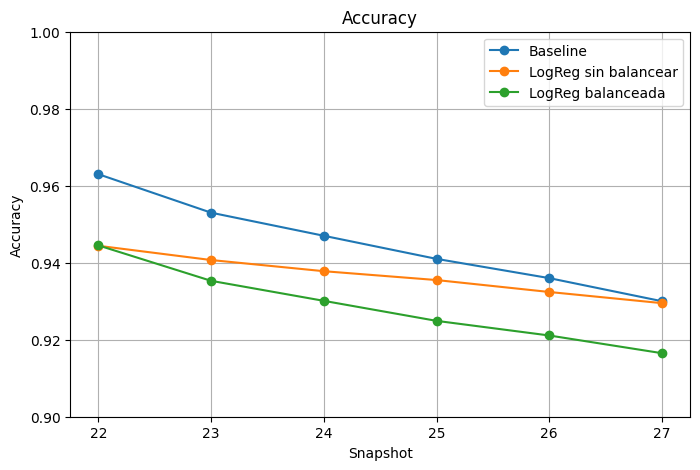

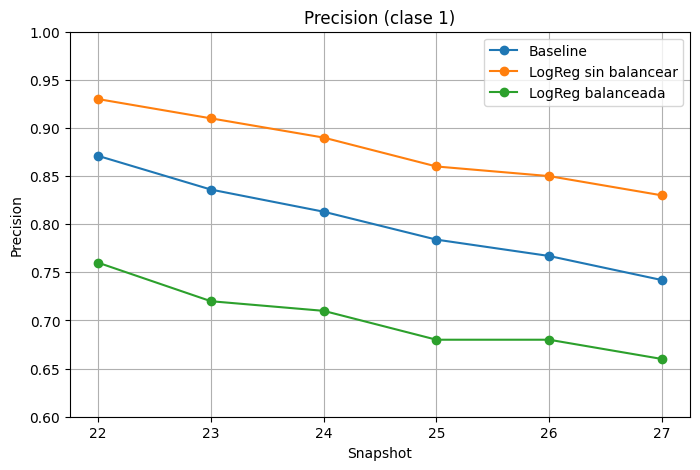

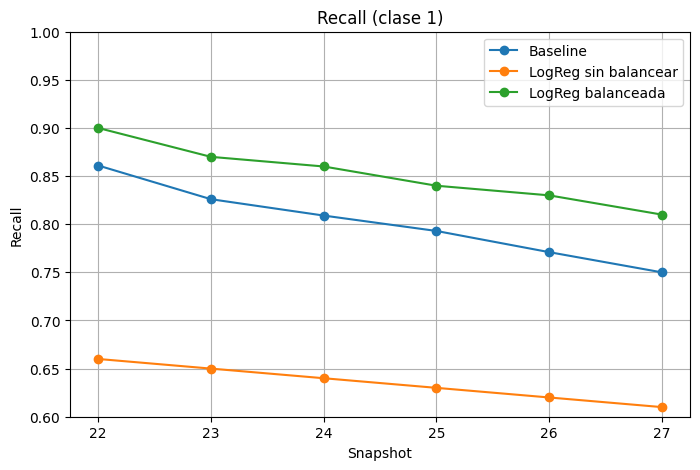

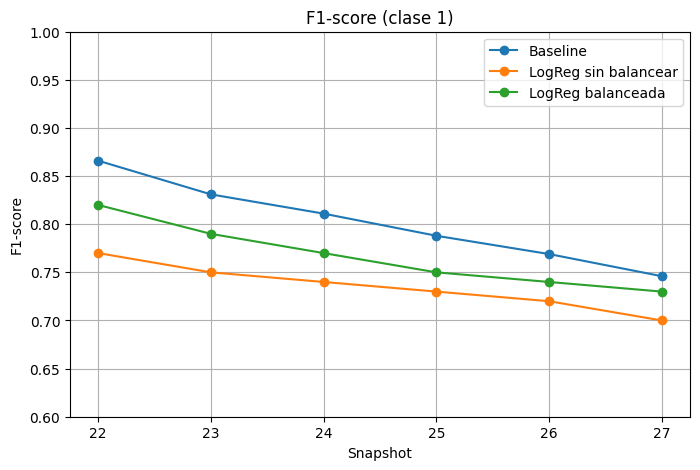

In [12]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Snapshots
snapshots = [22, 23, 24, 25, 26, 27]

# Baseline
bs_accuracy    = [0.963, 0.953, 0.947, 0.941, 0.936, 0.930]
bs_precision   = [0.871, 0.836, 0.813, 0.784, 0.767, 0.742]
bs_recall      = [0.861, 0.826, 0.809, 0.793, 0.771, 0.750]
bs_f1_score    = [0.866, 0.831, 0.811, 0.788, 0.769, 0.746]

# Logistic Regression sin balancear
lr_accuracy          = [0.9444, 0.9407, 0.9378, 0.9355, 0.9324, 0.9295]
lr_precision_class_1 = [0.93, 0.91, 0.89, 0.86, 0.85, 0.83]
lr_recall_class_1    = [0.66, 0.65, 0.64, 0.63, 0.62, 0.61]
lr_f1_class_1        = [0.77, 0.75, 0.74, 0.73, 0.72, 0.70]

# Logistic Regression balanceada
lrb_accuracy          = [0.9445, 0.9353, 0.9301, 0.9249, 0.9211, 0.9165]
lrb_precision_class_1 = [0.76, 0.72, 0.71, 0.68, 0.68, 0.66]
lrb_recall_class_1    = [0.90, 0.87, 0.86, 0.84, 0.83, 0.81]
lrb_f1_class_1        = [0.82, 0.79, 0.77, 0.75, 0.74, 0.73]

# Accuracy
plt.figure(figsize=(8, 5))
plt.plot(snapshots, bs_accuracy, label="Baseline", marker='o')
plt.plot(snapshots, lr_accuracy, label="LogReg sin balancear", marker='o')
plt.plot(snapshots, lrb_accuracy, label="LogReg balanceada", marker='o')
plt.title("Accuracy")
plt.xlabel("Snapshot")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.legend()
plt.show()

# Precision (clase 1)
plt.figure(figsize=(8, 5))
plt.plot(snapshots, bs_precision, label="Baseline", marker='o')
plt.plot(snapshots, lr_precision_class_1, label="LogReg sin balancear", marker='o')
plt.plot(snapshots, lrb_precision_class_1, label="LogReg balanceada", marker='o')
plt.title("Precision (clase 1)")
plt.xlabel("Snapshot")
plt.ylabel("Precision")
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.legend()
plt.show()

# Recall (clase 1)
plt.figure(figsize=(8, 5))
plt.plot(snapshots, bs_recall, label="Baseline", marker='o')
plt.plot(snapshots, lr_recall_class_1, label="LogReg sin balancear", marker='o')
plt.plot(snapshots, lrb_recall_class_1, label="LogReg balanceada", marker='o')
plt.title("Recall (clase 1)")
plt.xlabel("Snapshot")
plt.ylabel("Recall")
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.legend()
plt.show()

# F1-score (clase 1)
plt.figure(figsize=(8, 5))
plt.plot(snapshots, bs_f1_score, label="Baseline", marker='o')
plt.plot(snapshots, lr_f1_class_1, label="LogReg sin balancear", marker='o')
plt.plot(snapshots, lrb_f1_class_1, label="LogReg balanceada", marker='o')
plt.title("F1-score (clase 1)")
plt.xlabel("Snapshot")
plt.ylabel("F1-score")
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.legend()
plt.show()


In [6]:
lrb_precision_class_0 = [0.98, 0.98, 0.98, 0.97, 0.97, 0.97]
lrb_recall_class_0    = [0.95, 0.95, 0.94, 0.94, 0.94, 0.93]
lrb_f1_class_0        = [0.97, 0.96, 0.96, 0.96, 0.95, 0.95]


lr_precision_class_0 = [0.95, 0.94, 0.94, 0.94, 0.94, 0.94]
lr_recall_class_0    = [0.99, 0.99, 0.99, 0.98, 0.98, 0.98]
lr_f1_class_0        = [0.97, 0.97, 0.96, 0.96, 0.96, 0.96]


bs_precision_class_0 = [0.98, 0.97, 0.97, 0.97, 0.96, 0.96]
bs_recall_class_0    = [0.98, 0.97, 0.97, 0.97, 0.96, 0.96]
bs_f1_class_0        = [0.98, 0.97, 0.97, 0.97, 0.96, 0.96]


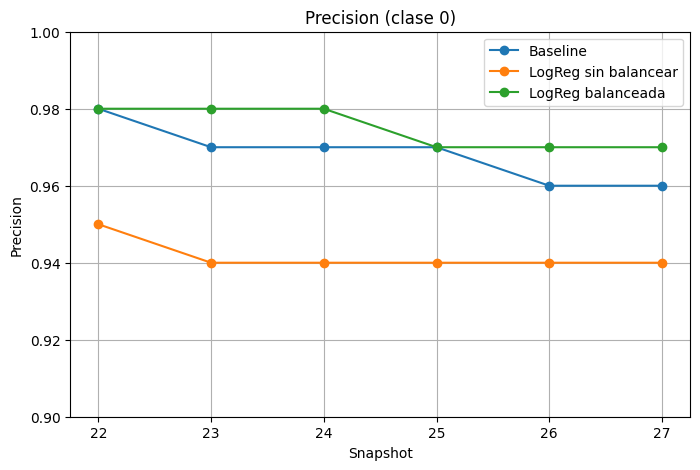

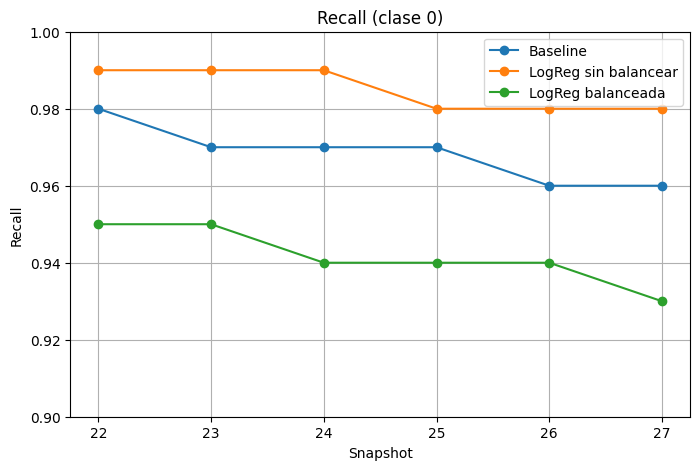

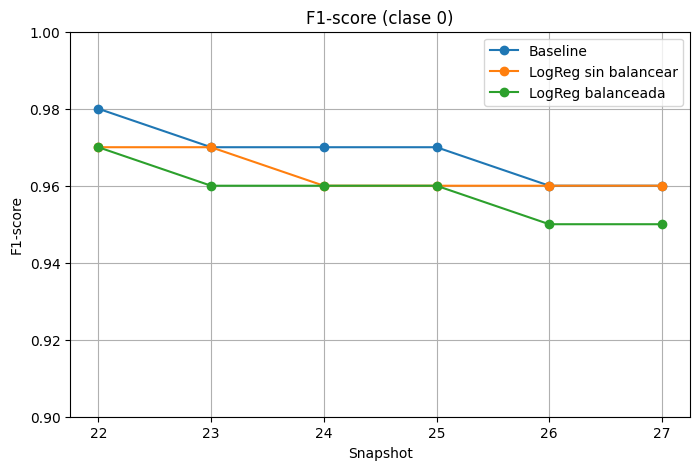

In [11]:
# Precision (clase 0)
plt.figure(figsize=(8, 5))
plt.plot(snapshots, bs_precision_class_0, label="Baseline", marker='o')
plt.plot(snapshots, lr_precision_class_0, label="LogReg sin balancear", marker='o')
plt.plot(snapshots, lrb_precision_class_0, label="LogReg balanceada", marker='o')
plt.title("Precision (clase 0)")
plt.xlabel("Snapshot")
plt.ylabel("Precision")
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.legend()
plt.show()

# Recall (clase 0)
plt.figure(figsize=(8, 5))
plt.plot(snapshots, bs_recall_class_0, label="Baseline", marker='o')
plt.plot(snapshots, lr_recall_class_0, label="LogReg sin balancear", marker='o')
plt.plot(snapshots, lrb_recall_class_0, label="LogReg balanceada", marker='o')
plt.title("Recall (clase 0)")
plt.xlabel("Snapshot")
plt.ylabel("Recall")
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.legend()
plt.show()

# F1-score (clase 0)
plt.figure(figsize=(8, 5))
plt.plot(snapshots, bs_f1_class_0, label="Baseline", marker='o')
plt.plot(snapshots, lr_f1_class_0, label="LogReg sin balancear", marker='o')
plt.plot(snapshots, lrb_f1_class_0, label="LogReg balanceada", marker='o')
plt.title("F1-score (clase 0)")
plt.xlabel("Snapshot")
plt.ylabel("F1-score")
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.legend()
plt.show()


## Regresion sobre el mismo año con y sin densidad

In [ ]:
#Snapshot base (21)
t = 21

#Features del Snapshot t
densities = density_matrix.flatten().reshape(-1, 1)
rca_values = adj_matrices_nb[t].flatten().reshape(-1, 1)
X = np.hstack([densities, rca_values])

#Target del Snapshot t+1 para training
y = adj_matrices[t].flatten()

#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluo en t+1 como antes
y_pred = model.predict(X_test)
print(f"\nEvaluación para snapshot {t}")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

#Sigo evaluando en los siguientes años como hacia con ddne y la baseline
for year in range(t + 1, 28):  
    print(f"\nPredicción para snapshot {year}")

    #Target real del snapshot futuro
    y_future = adj_matrices[year].flatten()

    #Seguimos usando los features X del año 22
    y_pred_future = model.predict(X)

    print(classification_report(y_future, y_pred_future))
    print("Accuracy:", accuracy_score(y_future, y_pred_future))



Evaluación para snapshot 21
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28730
         1.0       1.00      1.00      1.00      4644

    accuracy                           1.00     33374
   macro avg       1.00      1.00      1.00     33374
weighted avg       1.00      1.00      1.00     33374

Accuracy: 0.9996704021094265

Predicción para snapshot 22
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    143423
         1.0       0.87      0.86      0.87     23443

    accuracy                           0.96    166866
   macro avg       0.92      0.92      0.92    166866
weighted avg       0.96      0.96      0.96    166866

Accuracy: 0.9626646530749224

Predicción para snapshot 23
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97    143410
         1.0       0.84      0.82      0.83     23456

    accuracy                         

In [54]:
#Snapshot base (21)
t = 21

#Features del Snapshot t
densities = density_matrix.flatten().reshape(-1, 1)
rca_values = adj_matrices_nb[t].flatten().reshape(-1, 1)
X = rca_values

#Target del Snapshot t+1 para training
y = adj_matrices[t].flatten()

#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluo en t+1 como antes
y_pred = model.predict(X_test)
print(f"\nEvaluación para snapshot {t}")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

#Sigo evaluando en los siguientes años como hacia con ddne y la baseline
for year in range(t + 1, 28):  
    print(f"\nPredicción para snapshot {year}")

    #Target real del snapshot futuro
    y_future = adj_matrices[year].flatten()

    #Seguimos usando los features X del año 22
    y_pred_future = model.predict(X)

    print(classification_report(y_future, y_pred_future))
    print("Accuracy:", accuracy_score(y_future, y_pred_future))



Evaluación para snapshot 21
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28730
         1.0       1.00      1.00      1.00      4644

    accuracy                           1.00     33374
   macro avg       1.00      1.00      1.00     33374
weighted avg       1.00      1.00      1.00     33374

Accuracy: 0.9997003655540241

Predicción para snapshot 22
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    143423
         1.0       0.87      0.86      0.87     23443

    accuracy                           0.96    166866
   macro avg       0.92      0.92      0.92    166866
weighted avg       0.96      0.96      0.96    166866

Accuracy: 0.9626227032469167

Predicción para snapshot 23
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97    143410
         1.0       0.84      0.82      0.83     23456

    accuracy                         

In [ ]:
#Snapshot base (21)
t = 21

#Features del Snapshot t
densities = density_matrix.flatten().reshape(-1, 1)
rca_values = adj_matrices_nb[t].flatten().reshape(-1, 1)
X = np.hstack([densities, rca_values])

#Target del Snapshot t+1 para training
y = adj_matrices[t+1].flatten()

#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluo en t+1 como antes
y_pred = model.predict(X_test)
print(f"\nEvaluación para snapshot {t+1}")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

#Sigo evaluando en los siguientes años como hacia con ddne y la baseline
for year in range(t + 1, 28):  
    print(f"\nPredicción para snapshot {year}")

    #Target real del snapshot futuro
    y_future = adj_matrices[year].flatten()

    #Seguimos usando los features X del año 22
    y_pred_future = model.predict(X)

    print(classification_report(y_future, y_pred_future))
    print("Accuracy:", accuracy_score(y_future, y_pred_future))



Evaluación para snapshot 21
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     28661
         1.0       0.93      0.67      0.78      4713

    accuracy                           0.95     33374
   macro avg       0.94      0.83      0.87     33374
weighted avg       0.95      0.95      0.94     33374

Accuracy: 0.9463654341703123

Predicción para snapshot 22
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    143423
         1.0       0.93      0.68      0.78     23443

    accuracy                           0.95    166866
   macro avg       0.94      0.83      0.88    166866
weighted avg       0.95      0.95      0.94    166866

Accuracy: 0.9475687078254408

Predicción para snapshot 23
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    143410
         1.0       0.90      0.65      0.76     23456

    accuracy                         